## Programming and Applications for Data Analytics Project
### ISYS 812 - Guillaume Faddoul
### Group Members:
* **Kavita Kathaith**
* **Sairaj Rege**
* **Shailesh Krishna**
* **Sushma Srinivas**

## Section 1: Introduction

#### A. Dataset Name
* The dataset which we chose for our project is [Amazon Fine Food Reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews)

#### B. Dataset Description
* This dataset consists of reviews of fine foods from amazon. The dataset information for a period of ten years up to October 2012. Reviews include product and user data, ratings, and a plain text review. It also includes reviews from all other Amazon categories.  



* Below mentioned are the names of the columns in the dataset along with their descriptions:
    * IdRow: Id
    * ProductId: Unique identifier for the product
    * UserId: Unqiue identifier for the user
    * ProfileName: Profile name of the user
    * HelpfulnessNumeratorNumber: Number of users who found the review helpful
    * HelpfulnessDenominatorNumber: Number of users who indicated whether they found the review helpful or not
    * Score: Rating between 1 and 5
    * Time: Timestamp for the review
    * Summary: Brief summary of the review
    * Text: Text of the review


In [1]:
# Importing packages. Moved all the imports to the top.
import pandas as pd
import numpy as np
# Importing datetime
from datetime import datetime
# Importing matplotlib
import matplotlib.pyplot as plt
# Importing re
import re
# Importing gensim, need to intall it before it can be used.
import gensim
# Importing spacy, need to install it before it can be used.
import spacy
# Run in terminal: python -m spacy download en
import textstat
from textblob import TextBlob
#Import statsmodel
import statsmodels.api as sm
#Import packages for data modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
# Loading the dataset for analysis. Please note that the original dataset is named Reviews.csv.
# We have modified the name to AmazonFineFoodReviews.csv
reviews_dataset = pd.read_csv('../dataset/AmazonFineFoodReviews.csv')

In [3]:
# Display initial rows of the reviews_dataset
reviews_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Setting display properties for cells so that we can see the entire text and not truncated text as above.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
reviews_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [5]:
# Calculating total rows
total_rows = reviews_dataset.shape[0]
print("Total rows in the reviews dataset are: {}".format(total_rows))

Total rows in the reviews dataset are: 568454


In [6]:
# Calculating total columns
total_cols = reviews_dataset.shape[1]
print("Total columns in the reviews dataset are: {}".format(total_cols))

Total columns in the reviews dataset are: 10


In [7]:
# Calculating total count for each column
print(reviews_dataset.count())

Id                        568454
ProductId                 568454
UserId                    568454
ProfileName               568438
HelpfulnessNumerator      568454
HelpfulnessDenominator    568454
Score                     568454
Time                      568454
Summary                   568427
Text                      568454
dtype: int64


In [8]:
# Checking for null values in the dataset.
print("Are there null values in the reviews dataset?: {}".format(reviews_dataset.isnull().values.any()))

Are there null values in the reviews dataset?: True


In [9]:
# Counting missing values.
total_missing = total_rows - reviews_dataset.count()
print(total_missing)

Id                        0 
ProductId                 0 
UserId                    0 
ProfileName               16
HelpfulnessNumerator      0 
HelpfulnessDenominator    0 
Score                     0 
Time                      0 
Summary                   27
Text                      0 
dtype: int64


#### C. Dataset Information
Based on the above preliminary analysis done above we can conclude the following:
* Total rows: 568454
* Total columns: 10
* Missing values: There are a total of 47 missing values in the entire dataset. ProfileName is missing 16 values and Summary is missing 27 values respectively. 

## Section 2: Motivation

* The majority of the e-commerce companies provide us with an option to write a rating/review regarding the purchased product or a service used by us.


* These ratings/reviews help companies to optimize strategies to get more customers. On the other hand, they also help the customers to make a more informed decision regarding the purchase of a product or service.


* We would be doing an exploratory analysis to answer the below mentioned questions.

#### A. Questions
* How user engagement changed over the span of 10 years? Did the user always gave rating as 5?


* Which are the top 20 products that have received the maximum reviews?


* What are the top words in a review? In good as well as bad reviews.


* What are the three most important topics mentioned in bad ratings?


* What are the most important characteristics of a useful/helpful review?

## Section 3: Data Cleaning

#### A. Dropping missing values
* Based on the above table we can see that the ProfileName is missing 16 and Summary is missing 27 values.


* A total of 43 missing values in the entire dataset of 568454 records is very miniscule. Hence, we are dropping the missing values from the dataset.


* We will be using the dataset without thse missing values for our further analysis.

In [10]:
# Dropping missing values from the dataset.
reviews_dataset = reviews_dataset.dropna(how="any")

In [11]:
# Verifying the counts
print("The number of missing values in the reviews dataset are: {}".format(np.count_nonzero(reviews_dataset.isnull())))

The number of missing values in the reviews dataset are: 0


#### B. Checking duplicate rows
* We are checking if there are any duplicate rows in the data.


* If there are duplicate rows, we will be removing those rows before starting the data analysis and modeling

In [12]:
# Checking duplicate rows
duplicate_rows = reviews_dataset[reviews_dataset.duplicated()]
print("The total number of duplicate rows in the reviews dataset are: {}".format(duplicate_rows.shape[0]))
duplicate_rows.head()

The total number of duplicate rows in the reviews dataset are: 0


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


#### C. Checking whether each profile name corresponds to one user id
* We are trying to check if each profile name corresponds to one user id or not.


* This will help us in filtering out additional spam/duplicate rows from the dataset.

In [13]:
# Count unique profile names
print("Total unique profile names in the reviews dataset are: {}".format(len(reviews_dataset.ProfileName.unique())))

Total unique profile names in the reviews dataset are: 218413


In [14]:
# Count unique user ids
print("Total unique user ids in the reviews dataset are: {}".format(len(reviews_dataset.UserId.unique())))

Total unique user ids in the reviews dataset are: 256047


In [15]:
# Count unique product ids
print("Total unique product ids in the revies dataset are: {}".format(len(reviews_dataset.ProductId.unique())))

Total unique product ids in the revies dataset are: 74258


* Based on the above analysis we can see that there are 74258 unique products which were rated in the dataset.


* Also, the number of unique user ids is greater than unique profile names.

In [16]:
# Displaying initial profile names
reviews_dataset['ProfileName'].head()

0    delmartian                     
1    dll pa                         
2    Natalia Corres "Natalia Corres"
3    Karl                           
4    Michael D. Bigham "M. Wassir"  
Name: ProfileName, dtype: object

* Taking one profile name and checking how many user ids these profiles map to.


* Checked the above profile names and found that the profile name "Karl" maps to multiple user ids.

In [17]:
reviews_dataset[reviews_dataset.ProfileName == 'Karl'][["ProfileName","UserId"]]

,ProfileName,UserId
3,Karl,A395BORC6FGVXV
1622,Karl,A28FL0RSO744I8
14951,Karl,AO2EURP2Y4JZM
34393,Karl,A3ERW4BD2SMOTF
40645,Karl,A1XUMOH2FB2G6P
42806,Karl,AO2EURP2Y4JZM
133281,Karl,AO2EURP2Y4JZM
136303,Karl,A395BORC6FGVXV
141994,Karl,AO2EURP2Y4JZM
244813,Karl,A2K70G893JBLH8


* The above analysis clearly shows that the profile names are not unique and different users can have same profile name.

#### D. Timestamp Conversion
* The timestamp present in the dataset is the unix timestamp. We will convert it into a more readable format.


* Also, we will be adding three columns day, month and year in the dataset for further analysis.

In [18]:
# Function convert time
def convert_time(time):
    """
    Function to convert unixtime to readable date format.
    """
    return datetime.utcfromtimestamp(time).strftime('%Y-%m-%d')

reviews_dataset['ConvertedTime'] = reviews_dataset['Time'].apply(convert_time)

# displaying top records
reviews_dataset[['Time','ConvertedTime']].head()

,Time,ConvertedTime
0,1303862400,2011-04-27
1,1346976000,2012-09-07
2,1219017600,2008-08-18
3,1307923200,2011-06-13
4,1350777600,2012-10-21


In [19]:
# Adding columns year, month and day to the dataset.
reviews_dataset[['Year','Month','Day']] = reviews_dataset.ConvertedTime.str.split('-',expand=True)
reviews_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",2012-09-07,2012,09,07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",2008-08-18,2008,08,18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.,2011-06-13,2011,06,13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",2012-10-21,2012,10,21


#### E. Score Analysis
* We are trying to find, how the scores are distributed between 1 and 5

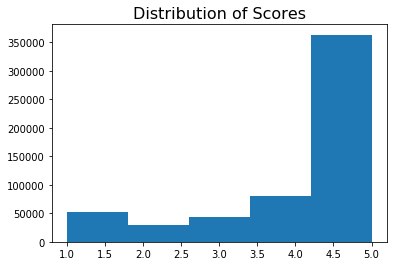

In [20]:
plt.hist(reviews_dataset['Score'], bins=5)
plt.title('Distribution of Scores', fontsize=16)
plt.show()

* From the above histogram we can see that the majority of ratings lie between 4 and 5.


* Very few products got bad reviews

#### F. HelpfulnessNumerator and HelpfulnessDenominator

  * HelpfulnessNumerator indicates the number of users who found the review helpful.
  
  
  * HelpfulnessDenominator indicates the number of people who found the review helpful or not.

In [21]:
# Number of rows where number of users who found the review helpful is greater than the number of users who voted for whether they found the review helpful.
reviews_dataset[reviews_dataset.HelpfulnessNumerator > reviews_dataset.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,"It was almost a 'love at first bite' - the perfectly roasted almond with a nice thin layer of pure flavorful cocoa on the top.<br /><br />You can smell the cocoa as soon as you open the canister - making you want to take a bite.<br /><br />You may or may not like the taste of this cocoa roasted almonds depending on your likingness for cocoa. We are so much used to the taste of chocolate (which is actually cocoa + many other ingredients like milk ...) - that you might have never really tasted really cocoa.<br /><br />Tasting this item it like tasting and enjoying flavorful pure raw cocoa with crunchy almonds in the center. Get yourself a box and see for yourself what real cocoa + almonds is !<br /><br />Where this product loses a star is in its packaging - the external sleeve is kind of comes in one piece, so if you try to remove the lid, the external sleeve kind of tends to come off fully - so careful when you are removing the external sleeve for the canister.",2008-06-08,2008,06,08
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate ordering this for him. He says they are great. I have tried them myself and they are delicious. Just open and pop them in the microwave. It is very easy. The best thing about ordering from Amazon grocery is that they deliver to your door. If you have a loved one that lives far away and may have limited transportation this is the answer. Just order what you want them to have and Amazon takes care of the rest.,2008-10-25,2008,10,25


* In the above scenario, we found that the number of users who found the review helpful was greater than the number of people who found the review helpful or not. So, we found it to be pretty unusual and we filtered out the rows.

In [22]:
# Filtering the above rows
reviews_dataset = reviews_dataset[reviews_dataset.HelpfulnessNumerator <= reviews_dataset.HelpfulnessDenominator]

#### G. Spam Identification
* Here we are checking if we have multiple records with same reviews for the same user and product.


In [23]:
check_multiple_records = reviews_dataset.groupby(["UserId","ProductId"]).size()
check_multiple_records[check_multiple_records > 1].head()

UserId          ProductId 
A102TGNH1D915Z  B00008DFK5    2
                B0002DHNXC    2
                B0009YD7P2    2
                B000SP1CWW    2
A106N4B4EG4DR8  B0008IT4OM    2
dtype: int64

* Here we are trying to identify fake/spam reviews written by bots. Using a couple of product and user ids from the above result to check if they have same reviews or not.

In [24]:
reviews_dataset[reviews_dataset.UserId.isin(["A29JUMRL1US6YP","A3TVZM3ZIXG8YW"]) & reviews_dataset.ProductId.isin(["B000084EZ4","B0002MLA5K"])].head()


Id   ProductId          UserId        ProfileName  \
97966  97967  B0002MLA5K  A3TVZM3ZIXG8YW  christopher hayes   
97971  97972  B0002MLA5K  A3TVZM3ZIXG8YW  christopher hayes   
97976  97977  B0002MLA5K  A3TVZM3ZIXG8YW  christopher hayes   
97979  97980  B0002MLA5K  A3TVZM3ZIXG8YW  christopher hayes   
97980  97981  B0002MLA5K  A3TVZM3ZIXG8YW  christopher hayes   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
97966  19                    21                      1      1291420800   
97971  18                    24                      1      1291420800   
97976  3                     3                       1      1291420800   
97979  7                     9                       1      1291420800   
97980  11                    15                      1      1291420800   

                                                         Summary  \
97966  Filler food is empty, leaves your cat always needing more   
97971  Filler food is empty, leaves your cat always needing more   
97976  Filler food is empty, leaves your cat always needing more   
97979  Filler food is empty, leaves your cat always needing more   
97980  Filler food is empty, leaves your cat always needing more   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

* Based on the above, we can see that for same userId and productId we have multiple records with same reviews at the same time.


* Irrespective of the product, the same user has rated multiple products at the same time with the same reviews.


* These are fake reviews and we will remove these reviews from the dataset to being with the analysis.

In [25]:
# Preparing clean dataset.
clean_dataset = reviews_dataset.groupby(["UserId","Time"]).filter(lambda g: len(g) == 1)[["Id","ProductId","UserId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Score","Time","Summary","Text","ConvertedTime", "Year","Month","Day"]]

#### H. Final Dataset
* In the above step we removed the fake reviews from the dataset and now the dataset which we have is the clean dataset which we are going to use for our data analysis.


* We will be creating a subset of this dataset or add additional columns to this dataset to get answer for the questions

In [26]:
# Total number of rows in final dataset
total_rows_in_clean_dataset = clean_dataset.shape[0]
print("Total number of rows in clean dataset are: {}".format(total_rows_in_clean_dataset))

Total number of rows in clean dataset are: 275875


In [27]:
# Checking if we still have fake reviews left in the clean dataset
check_multiple_records_in_cleaned = clean_dataset.groupby(["UserId","Time"]).size()
check_multiple_records_in_cleaned[check_multiple_records_in_cleaned > 1].head()

Series([], dtype: int64)

##### Snapshot of top 10 rows of final dataset

In [28]:
clean_dataset.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",2012-09-07,2012,09,07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",2008-08-18,2008,08,18
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",2012-10-21,2012,10,21
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,"I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.",2012-07-12,2012,07,12
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,"This saltwater taffy had great flavors and was very soft and chewy. Each candy was individually wrapped well. None of the candies were stuck together, which did happen in the expensive version, Fralinger's. Would highly recommend this candy! I served it at a beach-themed party and everyone loved it!",2012-06-20,2012,06,20
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and chewy. The flavors are amazing. I would definitely recommend you buying it. Very satisfying!!,2012-05-03,2012,05,03
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,2011-11-23,2011,11,23
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in th

## Section 4. Data Analysis

### Q1. Which products are reviewed the most?
* To answer this question we are going to plot the chart of productId vs review count.


* In the chart we are only going to display top 20 most reviewed products.

#### A. Data Preparation
* Creating a new dataframe containing two columns.


* Column 1 contains the product id.


* Column 2 contains the total review count per product id.

In [29]:
question1 = clean_dataset.groupby("ProductId").agg({"Text":"count"}).rename(columns={'Text': 'Review_Count'})
question1 = question1.reset_index()
question1.head()

,ProductId,Review_Count
0,0006641040,36
1,141278509X,1
2,2734888454,2
3,7800648702,2
4,9376674501,1


In [30]:
# Fetching top 20 products
question1_top20 = question1.sort_values(by = "Review_Count",ascending=False).head(20)
question1_top20.head()

,ProductId,Review_Count
56389,B007JFMH8M,894
37010,B003B3OOPA,553
23004,B001EO5Q64,491
13658,B000NMJWZO,443
55007,B006MONQMC,382


#### B. Plotting

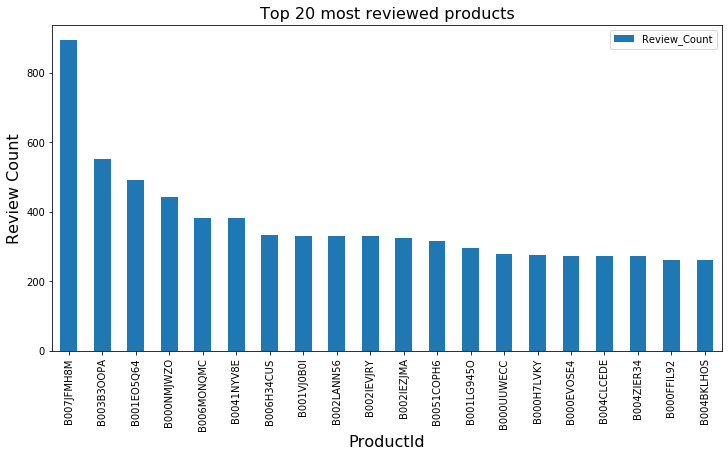

In [31]:
question1_top20.plot(x="ProductId", y="Review_Count",kind="bar",figsize =(12,6))
plt.title("Top 20 most reviewed products", fontsize=16)
plt.ylabel('Review Count',fontsize=16)
plt.xlabel('ProductId',fontsize=16)
plt.show()

### Q2. What are the review count trend over the years?
* To answer this question we are going to plot the chart of Year vs Review count.

#### A. Data Preparation
* Creating a new dataframe containing two columns.


* Column 1 contains the Year.


* Column 2 contains the total review count per year.

In [32]:
question2 = clean_dataset.groupby("Year").agg({"Text":"count"}).rename(columns={'Text': 'Review_Count'})
question2 = question2.reset_index()
question2.head()

,Year,Review_Count
0,1999,3
1,2000,6
2,2001,5
3,2002,10
4,2003,69


In [33]:
question2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Year            14 non-null object
Review_Count    14 non-null int64
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


* We are changing the datatype from object to int for plotting.

In [34]:
question2["Year"] = question2.Year.astype(np.int)
question2["Review_Count"] = question2.Review_Count.astype(np.int)
question2.head()

,Year,Review_Count
0,1999,3
1,2000,6
2,2001,5
3,2002,10
4,2003,69


#### B. Plotting

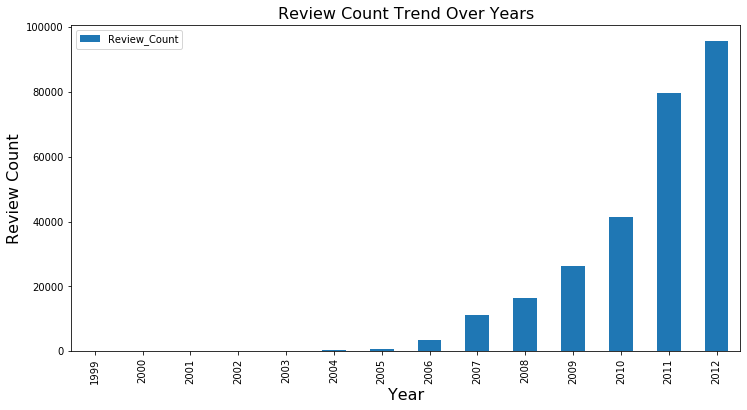

In [35]:
question2.plot(x="Year", y="Review_Count",kind="bar",figsize =(12,6))
plt.title("Review Count Trend Over Years", fontsize=16)
plt.ylabel('Review Count',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.show()

### Q3. What are the monthy review trends?
* To answer this question we are going to plot the chart of Month vs Review count.

#### A. Data Preparation
* Creating a new dataframe containing two columns.


* Column 1 contains the Month.


* Column 2 contains the total review count per month.

In [36]:
question3 = clean_dataset.groupby("Month").agg({"Text":"count"}).rename(columns={'Text': 'Review_Count'})
question3 = question3.reset_index()
question3.head()

,Month,Review_Count
0,01,24161
1,02,22273
2,03,23349
3,04,21479
4,05,22216


In [37]:
question3["Month"] = question3.Month.astype(np.int)
question3["Review_Count"] = question3.Review_Count.astype(np.int)

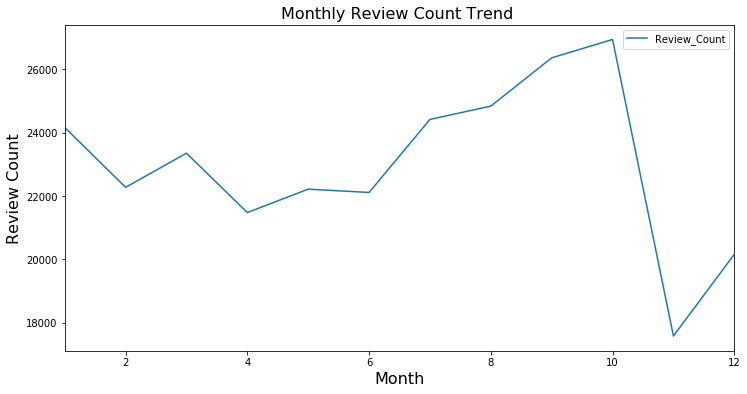

In [38]:
question3.plot(x="Month", y="Review_Count",kind="line",figsize =(12,6))
plt.title("Monthly Review Count Trend ", fontsize=16)
plt.ylabel('Review Count',fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.show()

### Q4. What are the three most important topics of a bad rating?
* We have considered bad rating because bad ratings influence people more than good ratings. It also impacts businesses more than good ratings


* Here we have categorized 1 and 2 as bad ratings.


* To prepare the dataframe we will use Score(ratings) to filter and Summary for topic modeling.

#### A. Data Preparation
* Bad ratings

In [39]:
bad_ratings = clean_dataset[(clean_dataset.Score ==1)|(clean_dataset.Score ==2)]
bad_ratings.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",2012-09-07,2012,09,07
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",2012-06-13,2012,06,13
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watching TV and looking at movies! It is not too sweet. I like to transfer them to a zip lock baggie so they stay fresh so I can take my time eating them.,2012-09-20,2012,09,20
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan and chewy . I would never buy them again",2012-03-25,2012,03,25
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.",2008-02-19,2008,02,19


* Preparing the text corpus

In [40]:
# Convert to list
summary_list = bad_ratings.Summary.values.tolist()

# Remove Emails
summary_list = [re.sub(r'\S*@\S*\s?', '', sent) for sent in summary_list]

# Remove new line characters
summary_list = [re.sub(r'\s+', ' ', sent) for sent in summary_list]

# Remove distracting single quotes
summary_list = [re.sub(r"\'", "", sent) for sent in summary_list]

print(summary_list[:1])

['Not as Advertised']


* Converting the sentences into words.

In [41]:
# Function sentence_to_words
def sentence_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
summary_words = list(sentence_to_words(summary_list))
print(summary_words[:1])

[['not', 'as', 'advertised']]


* Reducing the words to root words

In [42]:
# Function lemmatization
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)

nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
summary_lemmatized = lemmatization(summary_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb

print(summary_lemmatized[0:10])

['advertise', 'cat fan food', 'taste', 'flavor', 'like', 'product', 'taste', '', 'tea flavor', '']


* Building a DTM (Document Term Matrix) in order to vectorize the inputs to feed them into LDA model

In [43]:
# Intializing vectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}')  # num chars > 3
                             # max_features=50000,             # max number of uniq words 
summary_vectorized = vectorizer.fit_transform(summary_lemmatized)

#### B. Data Modeling
* Building LDA model

In [44]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=5,           # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(summary_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


* **Finding the best number of topics for LDA.**

In [45]:
# Define Search Param
search_params = {'n_components': [5, 10], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(summary_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),iid=True, n_jobs=1,
       param_grid={'n_topics': [5, 10], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/krishns18/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method=None,
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total_

In [46]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(summary_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -99669.35744834488
Model Perplexity:  361.4697995137236


In [47]:
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

In [48]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,acid,acquire,add,advertise,advertisement,advertising,aftertaste,agree,air,alcohol,alert,allergy,almond,alright,alternative,altoid,amazon,animal,ant,appear,apple,aroma,arrival,arrive,aspartame,attention,attract,avoid,baby,bacon,bag,bait,bake,baking,balance,ball,banana,bar,bargain,base,basket,batch,bean,bear,beef,beer,believe,benefit,berry,beverage,beware,bird,biscuit,bit,bite,blah,bland,blend,blood,blueberry,bone,bother,bottle,bowl,box,brand,bread,break,breakfast,brew,bring,broth,bubble,buck,bud,bug,bully,burn,business,butter,buy,buyer,buying,caffeine,cake,calorie,cancel,cancer,candy,cap,cappuccino,capsule,carb,card,cardboard,care,case,cashew,cat,catch,cause,caution,cereal,chai,chance,change,charge,cheat,check,cheese,chemical,cherry,chew,chewer,chewy,chicken,child,chip,chocolate,choice,choke,chowder,chunk,cinnamon,claim,clean,clump,coat,cocoa,coconut,coffee,color,come,company,compare,concentrate,concept,condition,consider,consistency,constipation,consumer,consumption,contain,container,contaminate,content,control,cook,cookie,corn,cost,cough,count,country,cover,crack,cracker,cranberry,crap,cream,creamer,create,crumb,crumble,crunch,crunchy,crush,crystal,cup,curry,customer,cut,dairy,damage,danger,date,day,deal,decaf,deceive,deliver,delivery,dent,description,deserve,design,destroy,diabetic,diarrhea,die,diet,difference,dioxide,dip,direction,dirt,disapointe,disapointment,disappoint,disappointment,disaster,disgust,dislike,dissapointe,dissappointe,dissolve,dog,dollar,double,dough,dressing,drink,drinker,drop,dry,dust,ear,earth,eat,effect,effort,egg,end,energy,enjoy,espresso,excuse,execution,expect,expectation,experience,expiration,expire,explode,extract,fact,fail,failure,fall,family,fan,farm,fat,feed,feel,fiber,fig,filler,filling,filter,finish,fish,fit,fix,flake,flavor,flavoring,flavour,floor,flop,flour,flower,fly,folk,food,fool,forget,form,formula,fraud,freshness,friend,fruit,fun,gag,garbage,garlic,gas,ghost,gift,ginger,glass,gluten,gnat,gold,good,got,gourmet,grade,grain,granola,grape,grass,gravy,grind,grit,grocery,ground,grove,grow,guess,gum,gumball,gummie,hair,half,hand,handle,happen,hate,hazard,hazelnut,head,health,heart,heat,help,hershey,hide,hike,hint,hit,hold,home,honey,hope,horrible,horrid,hour,house,hydrogenate,hype,ice,idea,ignore,image,imitation,impress,improve,improvement,include,increase,infest,info,information,ingredient,insect,instant,instruction,issue,item,jar,jasmine,jerky,job,joke,juice,junk,kcup,kid,kill,kind,kitchen,kitty,know,lab,label,labeling,lack,lead,leaf,leak,leave,lemon,let,level,licorice,lid,lie,life,light,like,line,liquid,list,listen,listing,litter,live,load,lollipop,look,lose,lot,love,lover,machine,mail,make,maker,man,mango,manufacture,mark,market,marketing,match,matter,meal,mean,meat,medicine,medium,meet,melt,mess,milk,mint,minty,minute,miracle,mislead,misrepresent,miss,mistake,mix,mold,moldy,mom,money,month,moth,mountain,mouth,msg,mustard,nature,need,noodle,note,nut,nutrition,oatmeal,odor,oil,olive,onion,open,opinion,option,orange,order,ounce,outdate,overpower,overprice,overrate,pack,package,packaging,packet,packing,pad,pain,palm,pancake,paper,par,pass,pasta,paste,pay,pea,peach,peanut,people,pepper,peppermint,pet,photo,pick,pickle,picture,pie,piece,pine,pineapple,pizza,place,plant,plastic,pod,point,poison,policy,poop,pop,popcorn,pork,portion,pot,potato,pouch,pound,powder,power,prefer,pressure,pretzel,price,pricing,print,problem,process,produce,product,promise,protein,puff,pump,pumpkin,punch,puppy,purchase,quality,quantity,question,rabbit,raisin,raman,ranch,raspberry,rate,rating,rawhide,reaction,read,reason,recall,receive,recieve,recipe,recommend,reduce,reese,refuse,reject,remember,replacement,represent,research,response,rest,restaurant,result,return,review,reviewer,revolt,rice,rip,ripoff,rise,risk,roast,robbery,rock,roll,rubber,ruin,run,safety,salad,sale,salmon,salt,salty,sampler,sand,sardine,sauce,save,saving,say,scam,scent,sea,seal,season,seasoning,seaweed,second,seed,selection,sell,seller,send,serve,se

In [49]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,dog,sugar,chocolate,ingredient,stuff,cup,box,salt,package,think,review,bar,mix,gluten,service
Topic 1,product,like,expect,cat,smell,love,overprice,change,bag,star,receive,shipping,time,disappointment,drink
Topic 2,flavor,coffee,price,tea,use,eat,item,packaging,water,date,break,cookie,advertise,bean,bottle
Topic 3,buy,make,money,quality,work,order,waste,food,rip,candy,look,want,arrive,ship,say
Topic 4,taste,beware,picture,contain,pack,try,oil,syrup,corn,purchase,advertising,disappoint,size,mislead,read


#### C. Interpretations
* As per the above keywords per topic we identified the following broad topics which are discussed in bad reviews rated by users.


##### Most important topics of bad reviews are as follows:
    1. Ingredient and packaging related aspects of products.
    2. Overpriced products and shipping disappointment.
    3. Packaging related aspects of producs
    4. Product quality
    5. Beware of misleading advertised product pictures leading to shipping disappointment. 
        

**Since the Topic 1, Topic 3 and Topic 4 revolve around the same topic keywords, we combined them into one.**

##### Thus, most important topics of bad reviews are:
    1. Ingredient, quality and packaging related aspects of products.
    2. Overpriced products and shipping disappointment.
    3. Beware of misleading advertised product pictures, leading to shipping disappointment. 

##### Insights/Suggestion
    1. Improve the quality and packaging of products.
    2. Scrutinize the delivery channels to reduce the overall product costs.
    3. Improve the delivery channels to reduce product shipping time.
    4. Company should ensure product pictures advertised should meet customer expectations.

### Q5. What are the most important characteristics of a helpful review?
* For this question we will measure helpfulness of a review using HelpfulnessScore which we are calculating using HelpfulnessNumerator and HelpfulnessDenominator given in the dataset. Following are the variable definitions given in the dataset.


    1. HelpfulnessNumerator - Number of users who found the review helpful
    
    2. HelpfulnessDenominator - Number of users who indicated whether they found the review helpful or not

#### A. Data Preparation
* Instead of using the already given variables we are creating our own predictor variable i.e. HelpfulnessScore to determine the characteristics of a helpful review.


* The fundamental use of this business question is to to find out whether we can find any meaningful characteristics which would make a review more helpful for other consumers.

In [50]:
#Removing HelpfulnessNumerator = 0 
clean_dataset = clean_dataset[clean_dataset["HelpfulnessNumerator"] != 0]

#Removing HelpfulnessDenominator = 0
clean_dataset = clean_dataset[clean_dataset["HelpfulnessDenominator"] != 0]

#Calculating helpfulness Score using existing features
clean_dataset["HelpfulnessScore"] = clean_dataset["HelpfulnessNumerator"]/clean_dataset["HelpfulnessDenominator"]

clean_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",2008-08-18,2008,08,18,1.0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,2011-11-23,2011,11,23,1.0
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0


* **Transforming the Helpfulness Score into binary variable for classification. If helpfulness score > 0.5 then 1 else 0**

In [51]:
def transform_helpfulness_score(HelpfulnessScore):
    """
    Function to return binary value 0,1 using HelpfulnessScore
    """
    if HelpfulnessScore >= 0.5:
        return 1
    else:
        return 0

clean_dataset["Bin_HelpfulnessScore"] = clean_dataset.HelpfulnessScore.apply(transform_helpfulness_score)
clean_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",2008-08-18,2008,08,18,1.0,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,2011-11-23,2011,11,23,1.0,1
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1


##### Calculate Word Count

In [52]:
def word_count(text):
    """
    Function to return word count of a text
    """
    return textstat.lexicon_count(text, removepunct=True)

clean_dataset["WordCount"] = clean_dataset.Text.apply(word_count)
clean_dataset.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore,WordCount
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1,48
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",2008-08-18,2008,08,18,1.0,1,92
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,2011-11-23,2011,11,23,1.0,1,26
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1,64
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1,79


##### Calculate Sentence Count


In [53]:
def sentence_count(text):
    """
    Function to return sentence count of a text
    """
    return textstat.sentence_count(text)

clean_dataset["SentenceCount"] = clean_dataset.Text.apply(sentence_count)
clean_dataset.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore,WordCount,SentenceCount
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1,48,3
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.",2008-08-18,2008,08,18,1.0,1,92,3
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too,2011-11-23,2011,11,23,1.0,1,26,3
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","One of my boys needed to lose some weight and the other didn't. I put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. The higher food sits going stale. They both really go for this food. And my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1,64,1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1,79,5


##### Calculate Sentiment Score

In [54]:
def calculate_sentiment(text):
    """
    Function to return the sentiment polarity of a text
    """
    return TextBlob(text).sentiment.polarity

# Lowercase Text 
clean_dataset["Text"] = clean_dataset["Text"].str.lower()
clean_dataset['SentimentScore'] = clean_dataset.Text.apply(calculate_sentiment)
clean_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore,WordCount,SentenceCount,SentimentScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1,48,3,0.450000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.",2008-08-18,2008,08,18,1.0,1,92,3,0.133571
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,2011-11-23,2011,11,23,1.0,1,26,3,0.428571
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","one of my boys needed to lose some weight and the other didn't. i put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. the higher food sits going stale. they both really go for this food. and my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1,64,1,0.012500
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"my cats have been happily eating felidae platinum for more than two years. i just got a new bag and the shape of the food is different. they tried the new food when i first put it in their bowls and now the bowls sit full and the kitties will not touch the food. i've noticed similar reviews related to formula changes in the past. unfortunately, i now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1,79,5,0.129924


##### Calculating Similarity Score
Calculate similarity score for each text with the top 200 words for already helpful reviews
    1. Filter helpful scores using HelfulnessScore_bin variable
    2. Build a Document-Term-Matrix(DTM)
    3. Determine the top 200 words
    4. Calculate Jaccard similarity score using the DTM for each review text

In [55]:
#1. Filter helpful scores using HelfulnessScore_bin variable
helpful_reviews = clean_dataset[clean_dataset["Bin_HelpfulnessScore"] == 1]
helpful_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore,WordCount,SentenceCount,SentimentScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1,48,3,0.450000
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.",2008-08-18,2008,08,18,1.0,1,92,3,0.133571
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,2011-11-23,2011,11,23,1.0,1,26,3,0.428571
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","one of my boys needed to lose some weight and the other didn't. i put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. the higher food sits going stale. they both really go for this food. and my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1,64,1,0.012500
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"my cats have been happily eating felidae platinum for more than two years. i just got a new bag and the shape of the food is different. they tried the new food when i first put it in their bowls and now the bowls sit full and the kitties will not touch the food. i've noticed similar reviews related to formula changes in the past. unfortunately, i now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1,79,5,0.129924


In [56]:
#2. Bulding DTM
# Convert to list
text_list = helpful_reviews.Text.values.tolist()

# Remove Emails
text_list = [re.sub(r'\S*@\S*\s?', '', sent) for sent in text_list]
# Remove new line characters
text_list = [re.sub(r'\s+', ' ', sent) for sent in text_list]

# Remove distracting single quotes
text_list = [re.sub(r"\'", "", sent) for sent in text_list]
print(text_list[:1])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
text_words = list(sent_to_words(text_list))
print(text_words[0:10])

['i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.']
[['have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'stew', 'than', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most'], ['this', 'is', 'confection', 'that', 'has', 'been', 'around', 'few', 'centuries', 'it', 'is', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'filberts', 'and', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coated', 'with', 'powdered', 'sugar', 'and', 'it', 'is', 'tiny', 'mouthful

In [57]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

nlp = spacy.load('en', disable=['parser', 'ner'])

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
text_lemmatized = lemmatization(text_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb

print(text_lemmatized[0:10])

['buy vitality can dog food product find quality product look stew process meat smell labrador appreciate product', 'confection century citrus nut case filbert cut square coat sugar mouthful chewy recommend treat story lion witch wardrobe treat seduce edmund sell brother sister witch', 'be sprout cat can eat grass love rotate wheatgrass rye', 'boy need lose weight put food floor chubby guy protein product food boy can jump food sit go go food chubby boy lose ounce week', 'cat eat felidae platinum year get bag shape food try food put bowl bowl sit kitty will touch food have notice review relate formula change past need find food cat will eat', 'flavor come pack love twizzler', 'daughter love twizzler shipment pound hit spot would expect package strawberry twizzler', 'oatmeal must oatmeal can scrape minute prepare escape fact oatmeal store brand oatmeal require stovetop preparation mccann get instant oatmeal brand try variety variety pack taste can prepare microwave add boiling water ext

In [58]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                      # minimum reqd occurences of a word 
                             stop_words='english',           # remove stop words
                             lowercase=True,                 # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}')# num chars > 3
                             # max_features=50000,           # max number of uniq words 
vec = vectorizer.fit(helpful_reviews['Text'])
text_vectorized = vec.fit_transform(text_lemmatized)

In [59]:
sum_words = text_vectorized.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:200]

[('taste', 59831),
 ('product', 49841),
 ('use', 49288),
 ('make', 47338),
 ('flavor', 42379),
 ('try', 39664),
 ('buy', 38300),
 ('tea', 36553),
 ('love', 35137),
 ('coffee', 30485),
 ('food', 28696),
 ('eat', 25614),
 ('time', 24953),
 ('order', 23113),
 ('price', 21604),
 ('add', 20134),
 ('bag', 19423),
 ('store', 19236),
 ('drink', 18220),
 ('think', 17980),
 ('say', 17387),
 ('box', 16885),
 ('water', 16580),
 ('like', 16421),
 ('chocolate', 16314),
 ('come', 16242),
 ('year', 16227),
 ('sugar', 16136),
 ('day', 16053),
 ('look', 15861),
 ('mix', 15855),
 ('want', 14706),
 ('brand', 14157),
 ('know', 14080),
 ('purchase', 13640),
 ('dog', 13397),
 ('recommend', 13292),
 ('work', 12945),
 ('cup', 12826),
 ('thing', 11875),
 ('need', 11704),
 ('pack', 11653),
 ('way', 11585),
 ('oil', 11066),
 ('package', 10956),
 ('lot', 10698),
 ('milk', 10667),
 ('stuff', 10325),
 ('ingredient', 10177),
 ('enjoy', 10014),
 ('cat', 9816),
 ('review', 9772),
 ('bit', 9629),
 ('sauce', 9380),
 ('qu

In [60]:
top200_words = words_freq[0:200]
final_top_200 = [item[0] for item in top200_words]
print(final_top_200)

['taste', 'product', 'use', 'make', 'flavor', 'try', 'buy', 'tea', 'love', 'coffee', 'food', 'eat', 'time', 'order', 'price', 'add', 'bag', 'store', 'drink', 'think', 'say', 'box', 'water', 'like', 'chocolate', 'come', 'year', 'sugar', 'day', 'look', 'mix', 'want', 'brand', 'know', 'purchase', 'dog', 'recommend', 'work', 'cup', 'thing', 'need', 'pack', 'way', 'oil', 'package', 'lot', 'milk', 'stuff', 'ingredient', 'enjoy', 'cat', 'review', 'bit', 'sauce', 'quality', 'bar', 'bottle', 'feel', 'treat', 'month', 'salt', 'smell', 'start', 'problem', 'snack', 'bean', 'candy', 'leave', 'cook', 'calorie', 'item', 'cookie', 'shipping', 'receive', 'people', 'butter', 'grocery', 'texture', 'rice', 'help', 'star', 'size', 'bread', 'recipe', 'week', 'arrive', 'fruit', 'sell', 'chicken', 'cereal', 'soup', 'serve', 'thank', 'read', 'case', 'company', 'open', 'diet', 'tell', 'minute', 'family', 'friend', 'expect', 'contain', 'cost', 'variety', 'pay', 'meal', 'gift', 'blend', 'honey', 'let', 'ounce', '

['taste', 'product', 'use', 'make', 'flavor', 'try', 'buy', 'tea', 'love', 'coffee', 'food', 'eat', 'time', 'order', 'price', 'add', 'bag', 'store', 'drink', 'think', 'say', 'box', 'water', 'like', 'chocolate', 'come', 'year', 'sugar', 'day', 'look', 'mix', 'want', 'brand', 'know', 'purchase', 'dog', 'recommend', 'work', 'cup', 'thing', 'need', 'pack', 'way', 'oil', 'package', 'lot', 'milk', 'stuff', 'ingredient', 'enjoy', 'cat', 'review', 'bit', 'sauce', 'quality', 'bar', 'bottle', 'feel', 'treat', 'month', 'salt', 'smell', 'start', 'problem', 'snack', 'bean', 'candy', 'leave', 'cook', 'calorie', 'item', 'cookie', 'shipping', 'receive', 'people', 'butter', 'grocery', 'texture', 'rice', 'help', 'star', 'size', 'bread', 'recipe', 'week', 'arrive', 'fruit', 'sell', 'chicken', 'cereal', 'soup', 'serve', 'thank', 'read', 'case', 'company', 'open', 'diet', 'tell', 'minute', 'family', 'friend', 'expect', 'contain', 'cost', 'variety', 'pay', 'meal', 'gift', 'blend', 'honey', 'let', 'ounce', '

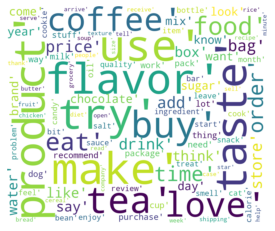

In [61]:

import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

text = str(final_top_200)
print(text)
wordcloud = WordCloud(width=1200, height=1000, min_font_size = 4, max_font_size = 200, font_step=1, max_words=100, background_color = "white").generate("".join(text))
plt.figure()
plt.imshow(wordcloud, interpolation ="bilinear")
plt.axis("off")
plt.show()

In [62]:
def get_jacc_sim(text):
    """
    Function to return the jaccard similarity score between text review and Top 200 Helpful reviews
    """
    a = set(text.split())
    b = set(final_top_200)
    c = a.intersection(b)
    return float(len(c))/ (len(a) + len(b) - len(c))

clean_dataset['JaccardSimScore'] = clean_dataset.Text.apply(get_jacc_sim)
clean_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore,WordCount,SentenceCount,SentimentScore,JaccardSimScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1,48,3,0.450000,0.021277
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.",2008-08-18,2008,08,18,1.0,1,92,3,0.133571,0.015267
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,2011-11-23,2011,11,23,1.0,1,26,3,0.428571,0.008929
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","one of my boys needed to lose some weight and the other didn't. i put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. the higher food sits going stale. they both really go for this food. and my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1,64,1,0.012500,0.008097
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"my cats have been happily eating felidae platinum for more than two years. i just got a new bag and the shape of the food is different. they tried the new food when i first put it in their bowls and now the bowls sit full and the kitties will not touch the food. i've noticed similar reviews related to formula changes in the past. unfortunately, i now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1,79,5,0.129924,0.011811


#### Calculate Readability Score

In [63]:
def get_readability_score(text):
    """
    Function to return the readability score
    """
    return textstat.flesch_reading_ease(text)

clean_dataset['ReadabilityScore'] = clean_dataset.Text.apply(get_readability_score)
clean_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ConvertedTime,Year,Month,Day,HelpfulnessScore,Bin_HelpfulnessScore,WordCount,SentenceCount,SentimentScore,JaccardSimScore,ReadabilityScore
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.,2011-04-27,2011,04,27,1.0,1,48,3,0.450000,0.021277,39.68
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar. and it is a tiny mouthful of heaven. not too chewy, and very flavorful. i highly recommend this yummy treat. if you are familiar with the story of c.s. lewis' ""the lion, the witch, and the wardrobe"" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.",2008-08-18,2008,08,18,1.0,1,92,3,0.133571,0.015267,-4.99
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too,2011-11-23,2011,11,23,1.0,1,26,3,0.428571,0.008929,78.93
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than their regular food","one of my boys needed to lose some weight and the other didn't. i put this food on the floor for the chubby guy, and the protein-rich, no by-product food up higher where only my skinny boy can jump. the higher food sits going stale. they both really go for this food. and my chubby boy has been losing about an ounce a week.",2010-08-27,2010,08,27,1.0,1,64,1,0.012500,0.008097,31.90
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,"my cats have been happily eating felidae platinum for more than two years. i just got a new bag and the shape of the food is different. they tried the new food when i first put it in their bowls and now the bowls sit full and the kitties will not touch the food. i've noticed similar reviews related to formula changes in the past. unfortunately, i now need to find a new food that my cats will eat.",2012-06-13,2012,06,13,1.0,1,79,5,0.129924,0.011811,16.67


In [64]:
X = clean_dataset[["Score","SentimentScore","WordCount","SentenceCount","JaccardSimScore","ReadabilityScore"]]
Y = clean_dataset["Bin_HelpfulnessScore"]

In [65]:
# To find the correlation among 
# the columns using pearson method 
X.corr(method ='pearson')

,Score,SentimentScore,WordCount,SentenceCount,JaccardSimScore,ReadabilityScore
Score,1.000000,0.439448,-0.040401,-0.027599,-0.002401,0.043188
SentimentScore,0.439448,1.000000,-0.177818,-0.102989,-0.140453,0.180414
WordCount,-0.040401,-0.177818,1.000000,0.575575,0.652688,-0.993449
SentenceCount,-0.027599,-0.102989,0.575575,1.000000,0.393726,-0.558507
JaccardSimScore,-0.002401,-0.140453,0.652688,0.393726,1.000000,-0.639533
ReadabilityScore,0.043188,0.180414,-0.993449,-0.558507,-0.639533,1.000000


##### Before we run any models we first wanted to check the correlation between the selected predictors. This is to check if any predictor is too strongly correlated with other. If that was the case then we can drop the predictor before running the models to avoid any noise.

#### B. Data Modeling

In [66]:
# Using the X and Y above
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=101)
X_train.head()

,Score,SentimentScore,WordCount,SentenceCount,JaccardSimScore,ReadabilityScore
244806,1,0.487500,49,3,0.012876,38.66
68837,5,0.266667,14,1,0.009434,14.97
438382,4,0.413333,38,1,0.004329,58.29
200021,5,0.650000,33,1,0.008772,63.36
549950,5,-0.080000,45,5,0.021459,34.26


In [67]:
y_train.head()

244806    0
68837     1
438382    1
200021    1
549950    1
Name: Bin_HelpfulnessScore, dtype: int64

In [68]:
print(len(X_train))
print(len(X_test))

93866
40229


In [69]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Users/krishns18/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
print(classification_report(y_test,predictions))

/Users/krishns18/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2353
           1       0.94      1.00      0.97     37876

    accuracy                           0.94     40229
   macro avg       0.47      0.50      0.48     40229
weighted avg       0.89      0.94      0.91     40229



##### ROC Curve

Baseline: ROC AUC=0.500
Logistic: ROC AUC=0.802


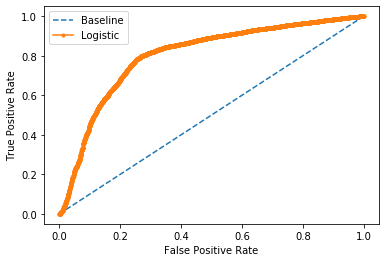

In [71]:
# roc curve and auc
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [72]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.182059
         Iterations 8
                           Results: Logit
Model:              Logit                Pseudo R-squared: 0.173     
Dependent Variable: Bin_HelpfulnessScore AIC:              34190.3455
Date:               2019-12-13 12:08     BIC:              34247.0432
No. Observations:   93866                Log-Likelihood:   -17089.   
Df Model:           5                    LL-Null:          -20656.   
Df Residuals:       93860                LLR p-value:      0.0000    
Converged:          1.0000               Scale:            1.0000    
No. Iterations:     8.0000                                           
----------------------------------------------------------------------
                   Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------------
Score              0.7194    0.0102  70.3971  0.0000   0.6994   0.7394
SentimentSco

#### C. Interpretations
    1. Rating of a review impacts the degree of helpfulness of a review.
    2. Number of words in the review impacts the degree of helpfulness of a review
    3. Surprisingly, sentence count and sentiment score doesn't have an impact on the helpfulness of a review.
    4. Reviews containing more words which describe the product and packaging attributes and provide recommandation are considered more helpful (Used top 200 words of helpful reviews).
    5. Readability score impacts the degree of helpfulness of a review. Thus, easier is it to read the review, the more helpful it is.

##### Insights
    1. Surprisingly, sentence count and sentiment score doesn't have an impact on the helpfulness of a review.
    2. Reviews containing more words which describe the product and packaging attributes and provide recommandation are considered more helpful.
    3. If a review is easier to read(considering Readability Score),more helpful the review is.